In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
def read_data_files(directory, df = pd.DataFrame()):
    for fn in glob.glob(os.path.join(directory, "*.log")):
        tmp = pd.read_csv(fn, header=0)
        df = df.append(tmp, ignore_index=True)
    return df

In [19]:
df = read_data_files("batch-outlier-expr1/")
del df["time"]
del df["esize"]
del df["qdepth"]
del df["nobjs"]
del df["batchsize"]
df["opname"] = df["opname"].map({"zlog_batch_write_simple": "simple",
                                 "zlog_batch_write_batch": "batch",
                                 "zlog_batch_write_batch_oident": "batch_oident"})

In [20]:
x = df.groupby(["opname", "outlier"]).mean()

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

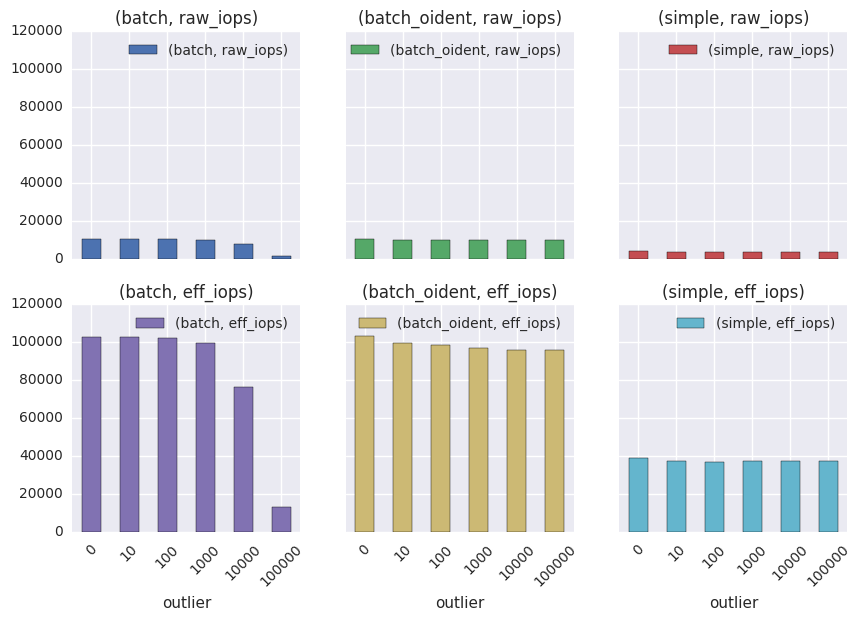

In [42]:
ax = x.unstack(level=0).swaplevel(axis=1).plot.bar(subplots=True, layout=(3,3), figsize=(10,10), sharey=True, rot=45)